# An IRL Approach

Having outlined the types of Hedge Funds, as well as their strategies, it is now time to begin analyzing the sources of risk present in these strategies and incorporate much of our knowledge in Statistical Learning to explore these dynamics over time.  In the notes, we have investigated a number of famous Hedge Fund distasters over time.  The major theme in these disasters is the over-reliance and over-leverage of particular trades and positions when markets shift.  We have also discussed the concept of market efficiency and analyzed the use and application of factor models in the ongoing active vs passive debate.  
  
One challenge in analyzing the risks exposure to particular Hedge Funds, is our inability to dissect and understand their trading philosophies and current market strategies. A method by which to get around this challenge has been to use of Style Analysis in order to identify the correlation of particular funds with various fundementals over time. Style analysis can be thought of as a form of Inverse Reinforement Learning (IRL).  In IRL, rather than being given an input data and a label and using a cost function and model to give a prediction, we use the known response of a person's behavior to figure out what goal that behavior seems to be trying to achieve, given known inputs or a known state-space. While we may use a cost function like Mean-Squared Error (MSE), in this approach, the aim is to find out an unbiased linear approximation of the investors investment philosophy, rather than a function which predicts an output. While style analysis is the simplest version of this, just observing the weight-space of a linear model over time and for different funds it provides key insights into the risk exposure of a particular fund.  
  
If a fund appears highly correlated with interest rates at a point in time, we can assume they have strategies which expose them to interest rate risk. If a particular fund is highly correlated with equity, we can imagine despite the intricacies of that strategy, over time the fund is exposed to market risk. The value in this techniques is its ability to understand the changing exposure of funds over time and how they respond to different market conditions.


In [1]:
# We will be importing many of the #
#  common libraries we have used before
import os
import pickle
from functools import reduce
from operator import mul

import pandas as pd
import numpy as np

from statsmodels.regression.linear_model import OLS
from sklearn import linear_model
from sklearn.decomposition import PCA

import holoviews as hv
import hvplot
import hvplot.pandas

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
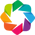

In [2]:
# We set teh seed and 
#  import the javascipt extensions for our plots
np.random.seed(42)
hv.extension('bokeh')

In [3]:
# There is a compatilibility issue with this library \
#and newer versions of Pandas, this is short fix to the problem, \
#if you have issues at this chunk comment it out and you should be fine.  
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

/home/haininhhoang94/anaconda3/envs/pyds/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


A warning to some of you running this code: the 3D plots do take a while to render. Please try your best to close other applications that may be using a large number of system resources. This set of notes is going to look at a common dataset of different Hedge Fund Strategies. Funds with these strategies have been grouped to form strategy indexes, namely: a Liquid Alternative Beta Index, an Event Driven Liquid Index, a Global Strategies Liquid Index, a Long/Short Liquid Index, a Managed Futures Liquid Index and a Merger Arbitrage Liquid Index.  

For those that are interested, I have included some code to download data on NASDAQ ETF's which should provide an interesting comparison in the types of funds. Most ETF should be highly market correlated, so you will see a very different correlation and scaling to the plots – which you may need to change. Unlike our previous note packs and peer review exercises there we have had to interpolate, detrend, scale and shape out data, this set of notes is far simpler as we will simply we looking at the daily returns on our different strategy indexes.

In [4]:
##### using this code, you can perform the code below on NASDAQ ETFs ####

# tickers = pdr.nasdaq_trader.get_nasdaq_symbols(retry_count=3, timeout=30, pause=None)
# etfs = tickers.loc[tickers.ETF == True, :]
# symbols = etfs.sample(75).index.tolist()

# packet = pdr.robinhood.RobinhoodHistoricalReader(symbols, retry_count=3, pause=0.1, timeout=30, session=None, freq=None, interval='day', span='year')

# data = packet.read().reset_index()
# pivot = data.loc[:,['symbol', 'begins_at', 'close_price']].drop_duplicates().pivot(index='begins_at', columns='symbol', values='close_price')

In [13]:
# We import our data from CSV
indexes = pd.read_csv('StyleIndexes.csv')

# We ensure the dates are recorded correctly and compute returns
indexes.Date = pd.to_datetime(indexes.Date)
indexes.index = indexes.Date
indexes = indexes.drop(columns=['Date'])
indexes = indexes.pct_change().dropna()

In [14]:
# As this is a large dataset, we will only look 
#  at the last 1000 trading-days
pivot = indexes.iloc[::-1,:].iloc[-1000:,:]
pivot.head()

Liquid Alternative Beta Index  Event Driven Liquid Index  \
Date                                                                   
2016-01-26                       0.003407                   0.003849   
2016-01-27                      -0.007023                  -0.002224   
2016-01-28                       0.002243                  -0.009758   
2016-01-29                      -0.004865                   0.002451   
2016-01-30                       0.006049                  -0.000521   

            Global Strategies Liquid Index  Long/Short Liquid Index  \
Date                                                                  
2016-01-26                        0.004988                 0.004456   
2016-01-27                       -0.002998                 0.000437   
2016-01-28                       -0.003897                 0.003343   
2016-01-29                       -0.000707                -0.003317   
2016-01-30                       -0.000447                 0.001144   

            Managed Futures Liquid Index  Merger Arbitrage Liquid Index  
Date                                                                     
2016-01-26                      0.000782                      -0.002519  
2016-01-27                      0.001592                      -0.000699  
2016-01-28                      0.006831                      -0.001829  
2016-01-29                      0.002221                       0.005409  
2016-01-30                     -0.001196                      -0.008144

Using the data above, the plot below shows the returns the different strategies achieved over time. While these strategies may seem very different in their investment approach, it is easy to see how correlated they appear over long periods of time. In 2008, hedge fund strategies took a serious hit, driven – in part – to investor confidence and liquidity within the funds. It appears in recent years that Long/Short Liquid and Managed Futures Strategies have performed strongly. The question remains: can we identify common risks to these strategies and can we identify the exposure of these risks to common market fundamentals? 

In [15]:
%%opts Curve [width=800 height=300] NdOverlay [legend_position='right'] 
pd.melt(indexes.add(1).cumprod().reset_index(), id_vars=['Date']).hvplot.line(y='value', x='Date', by='variable')

:NdOverlay   [variable]
   :Curve   [Date]   (value)

The first technique we are going to look at is Principle Component Analysis (PCA). As you have covered this method already in your Machine Learning course, we will not go into the details of the technique or its derivation. Using PCA we can identify sources of variance across the funds. Using the slider you can identify a start point in time and a window and observe the drift in the strategies over time. It appears over the 1000 days used in this interactive plot, that two components are a fairly strong predictor of strategy movements explaining roughly 70% of the variance between them.

Obviously, it is difficult to identify clearly what these components might represent, but we can imagine equity markets being a large source of variance. What is interesting to note from this plot, is that while many strategies move dramatically, Global Strategies remains fairly central– perhaps indicating its diversified exposure.  

In [16]:
# you can replace PCA with CCA, kernel PCA, FA or 
#  any other relevent method for dimensionality reduction
# labels just tells the function to include the 
#  names of the duffernt funds on the plot
class Component_Plots:
    def __init__(self, data=pivot, transformer=PCA(2), labels=True):
        self.data = data
        self.transformer = transformer
        self.labels = labels
    
    def components(self, start, window):
        component_data = self.transformer.fit_transform(self.data.iloc[start:(start+window),:].T)
        
        if self.labels:
            data_labels = reduce(mul, pd.DataFrame(component_data, index=self.data.columns.tolist(), 
                                             columns=['Component_1', 'Component_2'])\
                                               .reset_index()\
                                               .apply(lambda x: hv.Text(x[1], x[2], 
                                                                        ' '.join(x[0].split()[:-1]), fontsize=8), axis=1)\
                                               .tolist())
        else:
            data_labels = hv.Text(0,0,'')
    
        return pd.DataFrame(component_data, columns=['Component_1', 'Component_2'])\
                .hvplot.scatter(x='Component_1', y='Component_2')\
                .redim(Component_2={'range': (-0.1, 0.3)}, Component_1={'range': (-0.03, 0.05)})\
                .redim.label(Component_1=f'Component 1 {self.transformer.explained_variance_ratio_[0].round(4)}%', 
                             Component_2=f'Component 2 {self.transformer.explained_variance_ratio_[1].round(4)}%').options(alpha=1)*\
                data_labels

In [17]:
CompPlots = Component_Plots()

In [18]:
%%opts Scatter [width=800, height=400]
hv.DynamicMap(CompPlots.components, kdims=['start', 'window']).redim.range(start=(0,len(pivot.index))).redim.range(window=(30,90))

:DynamicMap   [start,window]
   :Overlay
      .Scatter.I :Scatter   [Component_1]   (Component_2)
      .Text.I    :Text   [x,y]
      .Text.II   :Text   [x,y]
      .Text.III  :Text   [x,y]
      .Text.IV   :Text   [x,y]
      .Text.V    :Text   [x,y]
      .Text.VI   :Text   [x,y]

While PCA may provide insights into latent risk, given market information, we may also want to understand how these strategies respond over time to changing market conditions. For this we are going to analyze three primary factors: 3-month US T-bills, NASDAQ Composite Returns and the US Weighted Exchange Rate. We will be sourcing this data through the pandas_datareader API, from the [FRED website](https://fred.stlouisfed.org/). Using this data, we are going to
 fit models to understand the covariance of these models to factors over time. In order to analyze this we are going to try observe not the input or output of these models, but the weight-space, to determine the effects of changes in strategies in response to changing factors. We imagine for Global Strategies Exchange Rate covariance may be high, while for Long/Short Strategies, Equity Exposure may be most important.

In [ ]:
# We download FRED data on 3-month Tbills, 
#  NASDAQ Comp and Exchnage rate mvts. 
factors = pdr.data.DataReader(['DTB3','NASDAQCOM','DTWEXB'], 'fred', start=str(pivot.index.min()), end=str(pivot.index.max()))
factors.loc[:,['NASDAQCOM','DTWEXB']] = factors.loc[:,['NASDAQCOM','DTWEXB']].pct_change()
factors.loc[:,['DTB3']]  = ((factors.loc[:,['DTB3']]+1)**(1/365)).pct_change()
factors = factors.dropna()
factors = factors.loc[pivot.index,:].interpolate().fillna(0)

While most of our factors appear faily stable, it is clear how astronomical the growth in the NASDAQ has been over this period.  As we imagine funds respond to changes in interest rates, we will look at changes to interest rates.  As such, we will be using:

$$\Delta (1+i)^{1/n}$$


In [ ]:
pd.melt(factors.add(1).cumprod().reset_index(), id_vars=['Date']).hvplot.line(y='value', x='Date', by='variable')

In [ ]:
# We must change the holoview 
#  backend to view a historic plot
hv.extension('matplotlib')

Given our three factors, we can use a 3 dimensional plot to best visualize and represent our weight-space and the movement of our strategies over time. Sadly, Holoview lacks functionality for 3D-text, though you should be able to track the movements of the dots to get an idea of the movements of strategies in this weight-space over time. Using the sliders, you should be able to adjust the starting point and window over which the weights are calculated.


In [ ]:
class Weight_Plots:
    def __init__(self, x=factors, y=pivot, transformer=linear_model.LinearRegression()):
        self.data = {'x':x,'y':y}
        self.transformer = transformer
    
    def weights(self, start=0, window=90):
        self.transformer.fit(X=self.data['x'].iloc[start:(start+window),:], y=self.data['y'].iloc[start:(start+window),:])
    
        return hv.Scatter3D(pd.DataFrame(self.transformer.coef_, index=pivot.columns, columns=['x','y','z']).reset_index(), vdims='index')\
    .redim(y={'range': (-0.5, 0.5)}, x={'range': (-150, 150)},  z={'range': (-1, 2)})\
    .redim.label(x=self.data['x'].columns[0], y=self.data['x'].columns[1], z=self.data['x'].columns[2])

In [ ]:
WeightPlots = Weight_Plots()
curve_dict_2D = {(s,w):WeightPlots.weights(s,w) for s in range(0,len(pivot.index),25) for w in range(30,90,15)}
hmap = hv.HoloMap(curve_dict_2D, kdims=['start', 'window']).collate()

In [ ]:
%%opts Scatter3D [fig_inches=8] (s=50)
hmap

Analyzing this plot, it is again clear the volatility in beta-derived strategies, such as 
Managed Futures, Long/Short Liquid and Liquid Alternative. In comparison, 
other strategies remain fairly central in our vector-space indicator their low correlations to T-bills, Beta and the Exchange Rate.

From the analysis in these notes we have begun to integrate our knowledge in machine learning and quantitative finance, to use method in IRL to analyze the risk exposures of various hedge fund strategies over time. Using this analysis, we can begin to understand how strategies respond to market events and the correlation between different strategies, from a fund of funds perspective. 